# Purpose of this notebook

### This notebook is to analyze over 1 million tweets collected within 1 week time period of mid term elections including the day of elections November, 6, 2018.
### Purpose of this notebook is to do deep analysis of tweets and garner useful intelligence.


In [1]:
 !jupyter kernelspec list

Available kernels:
  python3    C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tweetpy\share\jupyter\kernels\python3


In [2]:
!python --version

Python 3.6.7 :: Anaconda, Inc.


In [3]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import numpy as np
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import spacy
from collections import Counter
import operator
import time

In [4]:
csvfiles = glob.glob("c:\\users\\ashis\\tweetStream\\outputcsv\\*.csv")
print("CSV Files list:")
for file in csvfiles:
    print(file)

CSV Files list:
c:\users\ashis\tweetStream\outputcsv\electionresults-1.csv
c:\users\ashis\tweetStream\outputcsv\electionresults-2.csv
c:\users\ashis\tweetStream\outputcsv\electionresults-3.csv
c:\users\ashis\tweetStream\outputcsv\electionresults-3b.csv
c:\users\ashis\tweetStream\outputcsv\electionresults-4.csv
c:\users\ashis\tweetStream\outputcsv\electionresults-5.csv
c:\users\ashis\tweetStream\outputcsv\electionresults-6.csv
c:\users\ashis\tweetStream\outputcsv\elections1.csv
c:\users\ashis\tweetStream\outputcsv\elections2.csv
c:\users\ashis\tweetStream\outputcsv\elections2b.csv
c:\users\ashis\tweetStream\outputcsv\elections3.csv
c:\users\ashis\tweetStream\outputcsv\elections4.csv
c:\users\ashis\tweetStream\outputcsv\elections5.csv
c:\users\ashis\tweetStream\outputcsv\electionsresults3.csv
c:\users\ashis\tweetStream\outputcsv\midterm10.csv
c:\users\ashis\tweetStream\outputcsv\midterm11.csv
c:\users\ashis\tweetStream\outputcsv\midterm12.csv
c:\users\ashis\tweetStream\outputcsv\midterm1

In [5]:

## Analyze the source device for these tweets

def create_source_tweets_pie(tweetdata_df):
    source_results = tweetdata_df['source'].value_counts()
    #print(source_results.keys()[:5],source_results.values[:5])


    labels = source_results.keys()[:5]
    sizes = source_results.values[:5]

    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

    fig1, ax1 = plt.subplots(figsize=(10, 8))

    # Plot
    patches, texts, pct = ax1.pie(sizes, explode = explode, labels = sizes, 
                             autopct = '%2.2f%%', textprops=dict(color="black"), shadow=True, startangle=90)
    ax1.axis('equal')
    plt.legend(patches, labels, title = "Source of Tweets", bbox_to_anchor=(1.5,0.5), 
               loc="center right", fontsize=12) 
    plt.axis('equal')
    for t in texts:
        t.set_fontsize(16)
    for p in pct:
        p.set_fontsize(15)
    plt.title("Top 5 Source of Tweets.")
    plt.show()


    

In [6]:
#Analyze tweets location
def create_loc_tweets_pie(tweetdata_df):
    location_results = tweetdata_df['location'].value_counts()
    #print(location_results.keys()[:5],location_results.values[:5])


    labels = location_results.keys()[:10]
    sizes = location_results.values[:10]

    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0, 0, 0, 
               0, 0, 0, 0, 0)  # explode 1st slice

    fig1, ax1 = plt.subplots(figsize=(10, 8))

    # Plot
    patches, texts, pct = ax1.pie(sizes, explode = explode, labels = sizes, 
                             autopct = '%2.2f%%', textprops=dict(color="black"), shadow=True, startangle=90)
    ax1.axis('equal')
    plt.legend(patches, labels, title = "Source of Tweets", bbox_to_anchor=(1.5,0.5), 
               loc="center right", fontsize=12) 
    plt.axis('equal')
    for t in texts:
        t.set_fontsize(16)
    for p in pct:
        p.set_fontsize(15)
    plt.title("Location of Tweets.")
    plt.show()


In [7]:
## create word cloud


def create_word_cloud(tweetdata_df, max_words = 3000):
    stopwords = set(STOPWORDS)
    stopwords.add("RT")
    stopwords.add("now")
    stopwords.add("go")
    stopwords.add("https")
    stopwords.add("dont")
    stopwords.add("tell")
    stopwords.add("got")
    stopwords.add("say")
    stopwords.add("sure")
    stopwords.add("let")
    stopwords.add("Hey")
    stopwords.add("use")



    wordcloud = WordCloud(    width = 2000,
                              height= 1600,
                              background_color='black',
                              stopwords=stopwords,
                              max_words=max_words,
                              max_font_size=600, 
                              random_state=42
                             ).generate(str(tweetdata_df['tweet']))
    fig = plt.figure( figsize=(20,10),facecolor='k' )
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()

In [8]:
def orig_rt_pie(df):
    rt_tweets = len(df[df['tweet'].str.contains('RT')])
    total_tweets = len(df['tweet'])
    orig_tweets = total_tweets - rt_tweets
    
    labels = ['Retweets', 'Orig. Tweets']
    sizes = [rt_tweets, orig_tweets]

    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # explode 1st slice

    fig1, ax1 = plt.subplots(figsize=(10, 8))

    # Plot
    patches, texts, pct = ax1.pie(sizes, explode = explode, labels = sizes, 
                             autopct = '%2.2f%%', textprops=dict(color="black"), shadow=True, startangle=90)
    ax1.axis('equal')
    plt.legend(patches, labels, title = "Orig Vs. retweeted Tweets", bbox_to_anchor=(1.5,0.5), 
               loc="center right", fontsize=12) 
    plt.axis('equal')
    for t in texts:
        t.set_fontsize(16)
    for p in pct:
        p.set_fontsize(15)
    plt.title("ReTweets vs. Tweets.")
    plt.show()




In [9]:

def create_entity_piechart(sorted_dict):

    labels = sorted_dict.keys()
    sizes = sorted_dict.values()
    

    fig1, ax1 = plt.subplots(figsize=(10, 8))

    # Plot
    patches, texts = ax1.pie(sizes, labels = sizes, shadow=True, startangle=90)
    ax1.axis('equal')
    plt.legend(patches, labels, title = "Entities", bbox_to_anchor=(1.5,0.5), 
               loc="center right", fontsize=12) 
    plt.axis('equal')
    for t in texts:
        t.set_fontsize(16)
    plt.title("Top 25 entities")
    plt.show()

In [10]:
def create_entity_dictionary(results_df):
    ENTITY_SIZE = 10000
    np.random.seed(int(time.time()))
    tweets_txt = results_df['tweet'][np.random.randint(results_df.shape[0], size=ENTITY_SIZE)].tolist()
    tweets_txt = " ".join(tweets_txt)
    tweets_txt = tweets_txt.replace("RT", "")
    parser = spacy.load('en')
    parser.max_length = 10000000
    ParsedSentence = parser(tweets_txt)
    entity_list = []
    for Entity in  ParsedSentence.ents:  
        if Entity.label_ == "PERSON":
            entity_list.append(' '.join(t.orth_ for t in Entity))
            #print (Entity.label, Entity.label_, ' '.join(t.orth_ for t in Entity))
    sorted_person_dict = {}
    person_dict = Counter(entity_list)
    sorted_keys = sorted(person_dict, key=person_dict.get, reverse=True)
    for r in sorted_keys[:25]:
        sorted_person_dict[r] = person_dict[r]
        
    return sorted_person_dict  

## Tweets sent on Nov 4 (Sunday) and Nov 5 (afternoon)

In [11]:
tweetwkend_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/midterm3.csv", header=None)
tweetwkend_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("3:", tweetwkend_df.shape)

tweetwkend4_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/midterm4.csv", header=None)
tweetwkend4_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("4:", tweetwkend4_df.shape)

tweetwkend5_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/midterm5.csv", header=None)
tweetwkend5_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("5:", tweetwkend5_df.shape)

tweetwkend15_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/midterm15.csv", header=None)
tweetwkend15_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("15:", tweetwkend15_df.shape)

tweetwkend16_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/midterm16.csv", header=None)
tweetwkend16_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("16:", tweetwkend16_df.shape)

tweetwkend17_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/midterm17.csv", header=None)
tweetwkend17_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("17:", tweetwkend17_df.shape)

tweetwkend_df = pd.concat([tweetwkend_df, tweetwkend15_df], ignore_index=True, axis = 0)
tweetwkend_df = pd.concat([tweetwkend_df, tweetwkend16_df], ignore_index=True, axis = 0)
tweetwkend_df = pd.concat([tweetwkend_df, tweetwkend17_df], ignore_index=True, axis = 0)
tweetwkend_df = pd.concat([tweetwkend_df, tweetwkend4_df], ignore_index=True, axis = 0)
tweetwkend_df = pd.concat([tweetwkend_df, tweetwkend5_df], ignore_index=True, axis = 0)

print("Total (weekend) :", tweetwkend_df.shape)

del tweetwkend4_df
del tweetwkend5_df
del tweetwkend15_df
del tweetwkend16_df
del tweetwkend17_df

Total (weekend) : (420917, 9)


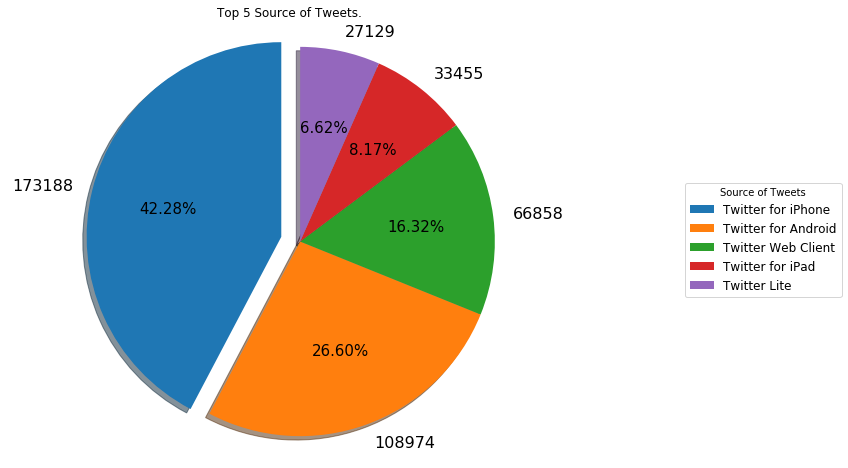

In [12]:
create_source_tweets_pie(tweetwkend_df)

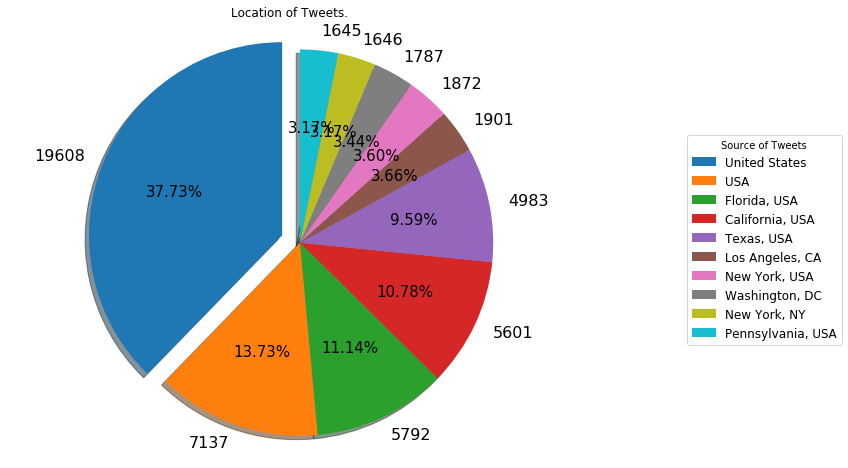

In [13]:
create_loc_tweets_pie(tweetwkend_df)

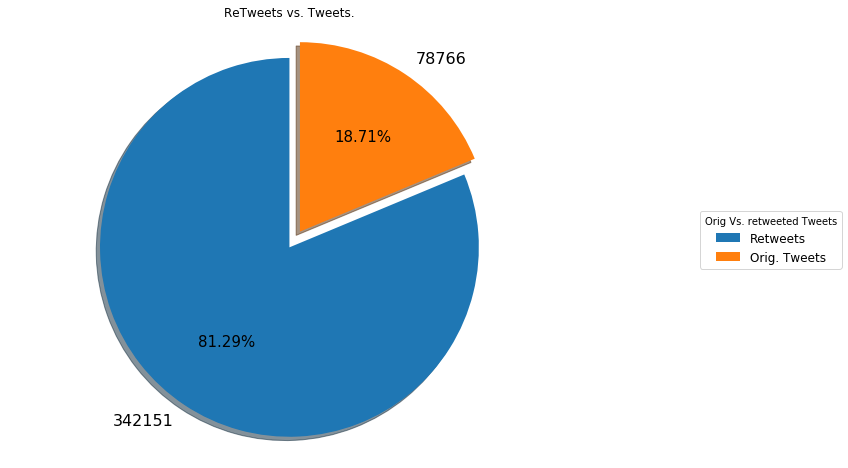

In [14]:
orig_rt_pie(tweetwkend_df)

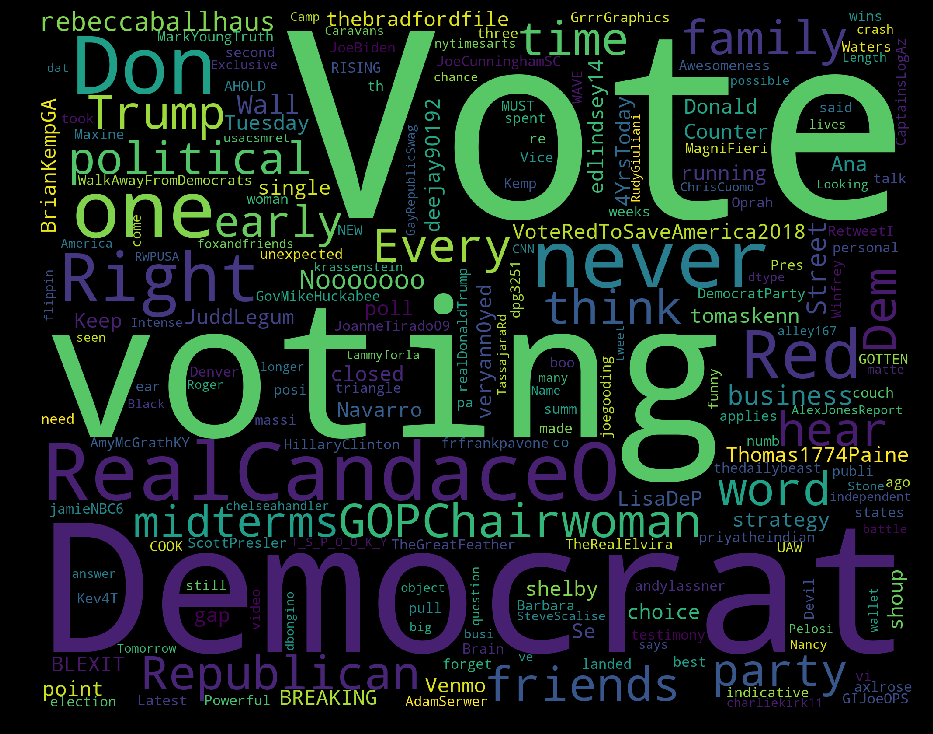

In [15]:
create_word_cloud(tweetwkend_df)

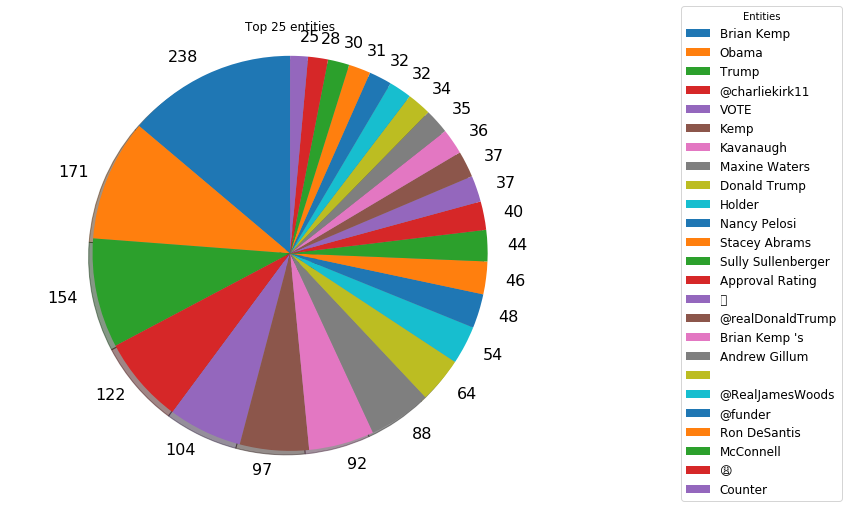

In [16]:
sorted_entity_dict = create_entity_dictionary(tweetwkend_df)    
create_entity_piechart(sorted_entity_dict)

# Morning of Nov 6 - Election day

In [17]:
## Start with sample csv
tweetdata_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/elections1.csv", header=None)

tweetdata_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print(tweetdata_df.shape)

tweetdata2_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/elections2.csv", header=None)
tweetdata2_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("2:", tweetdata2_df.shape)

tweetdata3_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/elections3.csv", header=None)
tweetdata3_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("3:", tweetdata3_df.shape)

tweetdata4_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/elections4.csv", header=None)
tweetdata4_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("4:", tweetdata4_df.shape)
'''
tweetdata5_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/elections5.csv", header=None)
tweetdata5_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
print("3:", tweetdata5_df.shape)
tweetdata_df = pd.concat([tweetwkend_df, tweetdata5_df], ignore_index=True, axis = 0)
'''
tweetdata_df = pd.concat([tweetdata_df, tweetdata2_df], ignore_index=True, axis = 0)
tweetdata_df = pd.concat([tweetdata_df, tweetdata3_df], ignore_index=True, axis = 0)
tweetdata_df = pd.concat([tweetdata_df, tweetdata4_df], ignore_index=True, axis = 0)

print("Total (morning elections) = ", tweetdata_df.shape)

del tweetdata2_df
del tweetdata3_df
del tweetdata4_df

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tweetpy\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total (morning elections) =  (552762, 9)


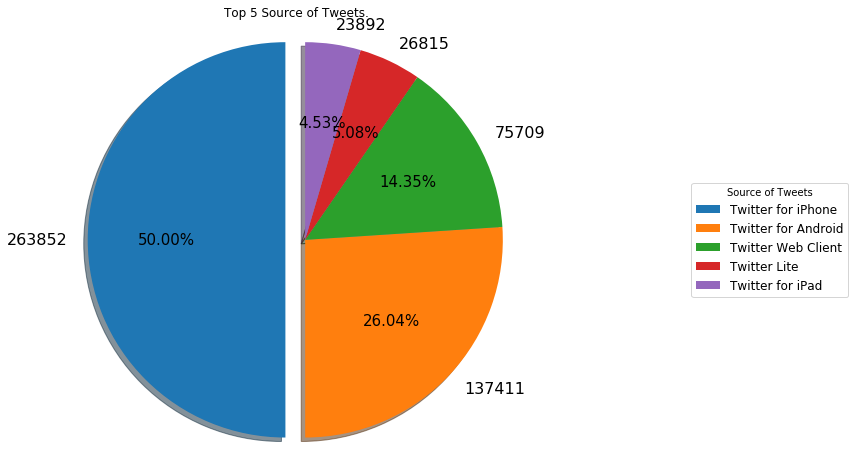

In [18]:
create_source_tweets_pie(tweetdata_df)

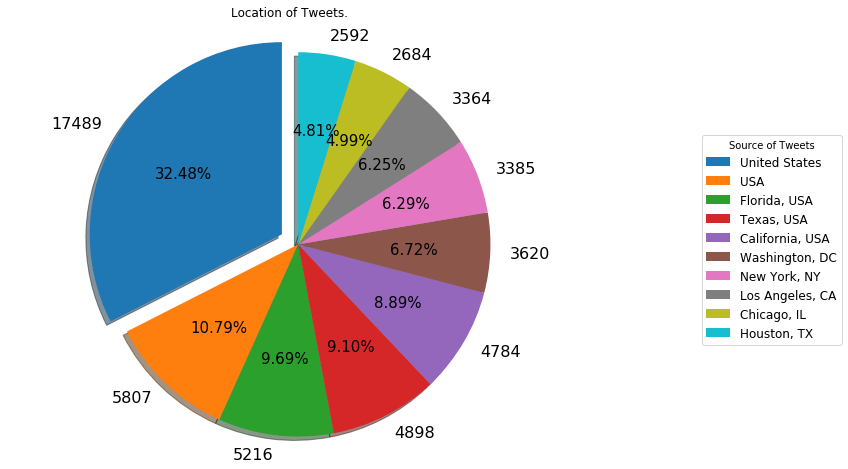

In [19]:
create_loc_tweets_pie(tweetdata_df)

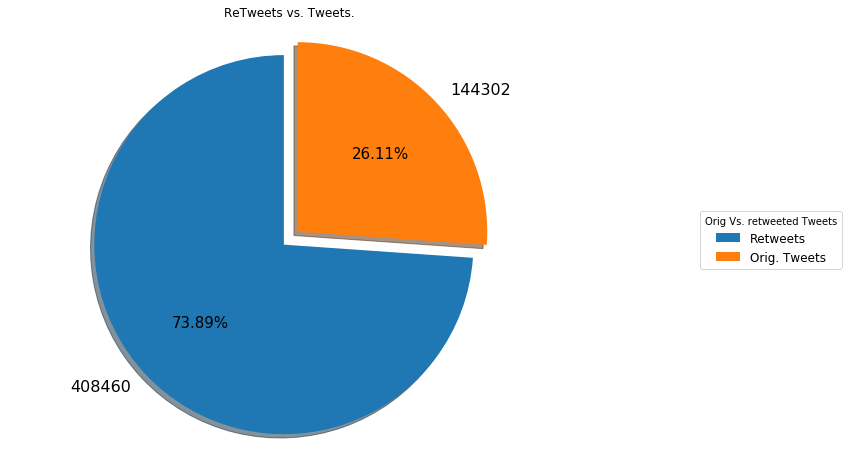

In [20]:
orig_rt_pie(tweetdata_df)

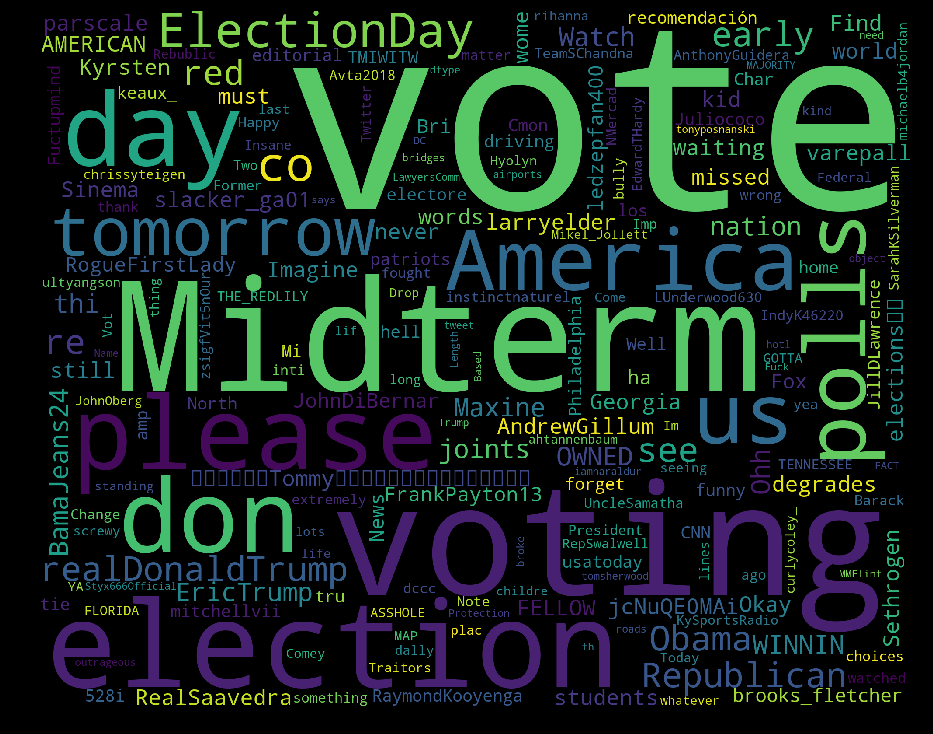

In [21]:
create_word_cloud(tweetdata_df)


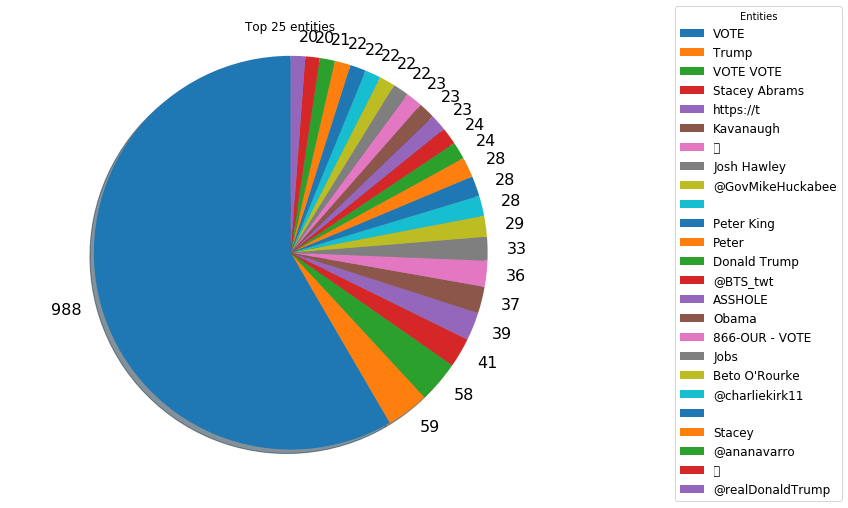

In [22]:
sorted_entity_dict = create_entity_dictionary(tweetdata_df)    
create_entity_piechart(sorted_entity_dict)

In [23]:
#process and analyze timestamps

from datetime import datetime
ts = int(tweetwkend_df['timestamp'][100]/10)
datetime.fromtimestamp(ts).strftime("%A, %B %d, %Y %I:%M:%S"), datetime.fromtimestamp(ts).strftime('%F-%T')

('Sunday, November 04, 2018 10:02:38', '2018-11-04-10:02:38')

## Election Night

In [24]:
results_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/electionresults-1.csv", header=None)
results_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("1:", results_df.shape)

results2_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/electionresults-2.csv", header=None)
results2_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("2:", results2_df.shape)

results3_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/electionresults-3.csv", header=None)
results3_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("3:", results3_df.shape)

results3b_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/electionresults-3b.csv", header=None)
results3b_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("3b:", results3b_df.shape)

results4_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/electionresults-4.csv", header=None)
results4_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("4:", results4_df.shape)

results5_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/electionresults-5.csv", header=None)
results5_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("5:", results5_df.shape)

results6_df = pd.read_csv("c:/users/ashis/tweetStream/outputcsv/electionresults-6.csv", header=None)
results6_df.columns = ['id', 'tweet', 'source', 'user_id', 'screenname', 'followers', 'location', 'lang', 'timestamp' ]
#print("6:", results6_df.shape)

results_df = pd.concat([results_df, results2_df], ignore_index=True, axis = 0)
results_df = pd.concat([results_df, results3_df], ignore_index=True, axis = 0)
results_df = pd.concat([results_df, results3b_df], ignore_index=True, axis = 0)
results_df = pd.concat([results_df, results4_df], ignore_index=True, axis = 0)
results_df = pd.concat([results_df, results5_df], ignore_index=True, axis = 0)
results_df = pd.concat([results_df, results6_df], ignore_index=True, axis = 0)

print("Total (results night):", results_df.shape)

del results2_df
del results3_df
del results3b_df
del results4_df
del results5_df

Total (results night): (1337922, 9)


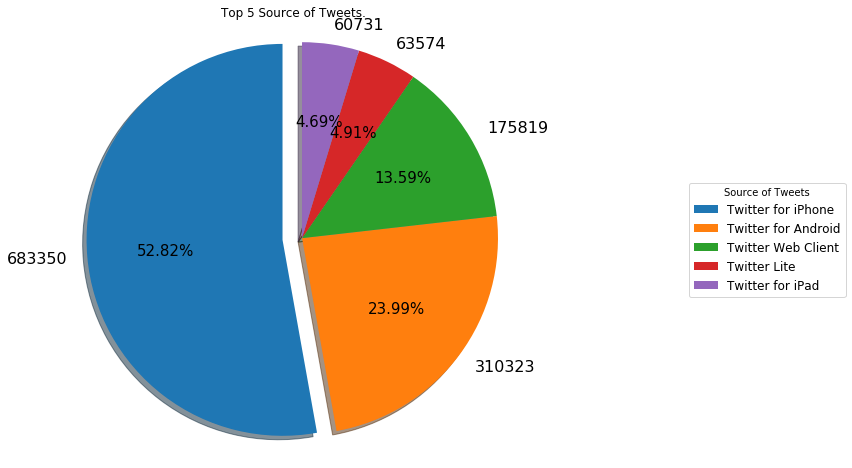

In [25]:
create_source_tweets_pie(results_df)

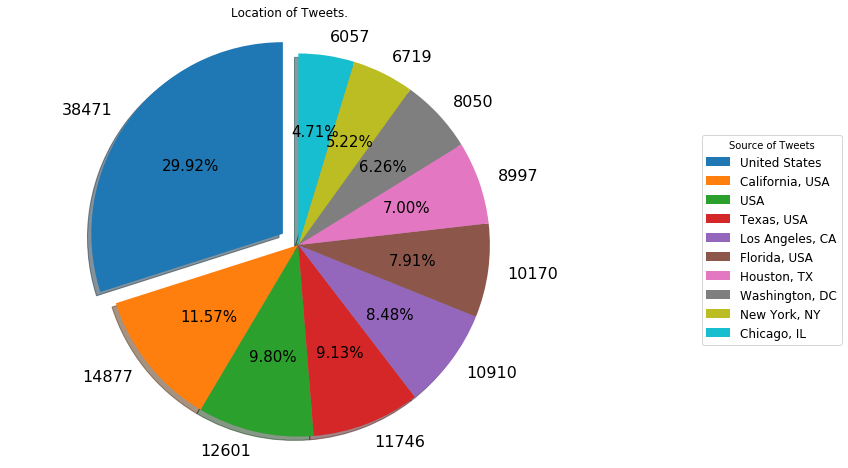

In [26]:
create_loc_tweets_pie(results_df)

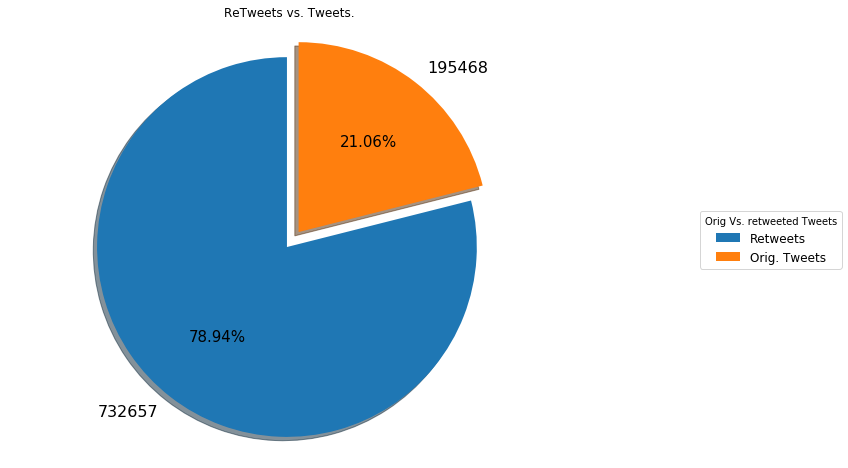

In [27]:
orig_rt_pie(results_df.dropna())

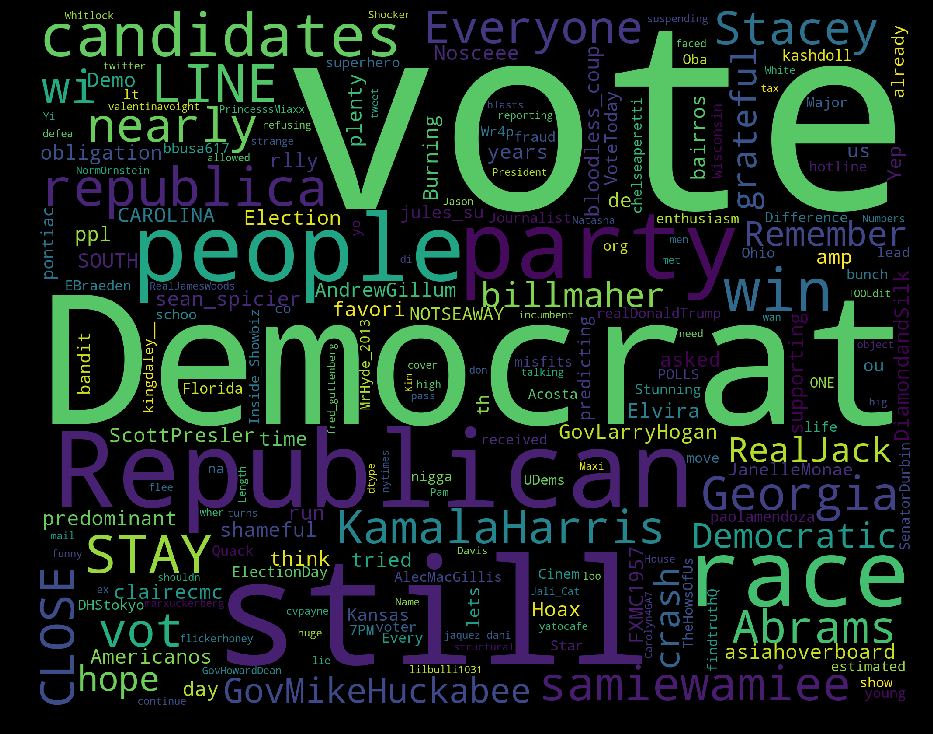

In [28]:
create_word_cloud(results_df, max_words = 50000)

In [29]:
#run it only once
#!python -m spacy download en

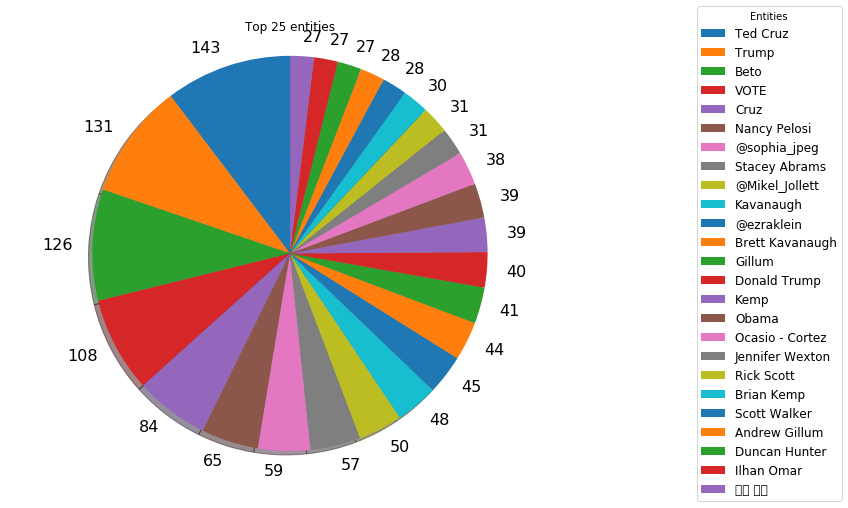

In [30]:
sorted_entity_dict = create_entity_dictionary(results_df)    
create_entity_piechart(sorted_entity_dict)